In [7]:
import sys
print(sys.executable)

C:\Users\mekha\AppData\Local\Programs\Python\Python312\python.exe


In [9]:
! "C:\Users\mekha\AppData\Local\Programs\Python\Python312\python.exe" -m pip install tensorflow

In [10]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [13]:
import csv

import numpy as np
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [14]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [15]:
NUM_CLASSES = 6

# 学習データ読み込み

In [16]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [17]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [20]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False
)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [25]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [26]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step - accuracy: 0.1562 - loss: 1.8792
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - accuracy: 0.1603 - loss: 1.8796 - val_accuracy: 0.1591 - val_loss: 1.7836
Epoch 2/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2188 - loss: 1.8152
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.2137 - loss: 1.8183 - val_accuracy: 0.1818 - val_loss: 1.7794
Epoch 3/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1641 - loss: 1.8588
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.1603 - loss: 1.8628 - val_accuracy: 0.2045 - val_loss: 1.7758
Epoch 4/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2109 - loss: 1.8106
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
2/2 ━━━━━

Epoch 55/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8672
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8241 - val_loss: 0.2242 - val_accuracy: 0.9578
Epoch 56/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4607 - accuracy: 0.7734
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8277 - val_loss: 0.2168 - val_accuracy: 0.9605
Epoch 57/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7969
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8214 - val_loss: 0.2211 - val_accuracy: 0.9578
Epoch 58/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.4393 - ac

Epoch 82/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5132 - accuracy: 0.8047
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8460 - val_loss: 0.2045 - val_accuracy: 0.9605
Epoch 83/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4239 - accuracy: 0.8125
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8313 - val_loss: 0.1984 - val_accuracy: 0.9605
Epoch 84/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4853 - accuracy: 0.8203
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.8304 - val_loss: 0.2024 - val_accuracy: 0.9623
Epoch 85/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4782 - ac

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [27]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7727 - loss: 0.8272


In [28]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [29]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
[0.01707282 0.01673933 0.05178002 0.01396295 0.10060173 0.7998431 ]
5


# 混同行列

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step 


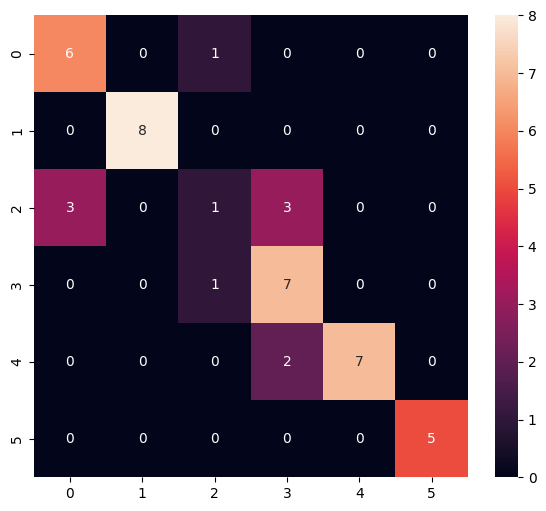

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       1.00      1.00      1.00         8
           2       0.33      0.14      0.20         7
           3       0.58      0.88      0.70         8
           4       1.00      0.78      0.88         9
           5       1.00      1.00      1.00         5

    accuracy                           0.77        44
   macro avg       0.76      0.78      0.75        44
weighted avg       0.77      0.77      0.75        44



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [31]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [32]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mekha\AppData\Local\Temp\tmpvjuwyhj_\assets


INFO:tensorflow:Assets written to: C:\Users\mekha\AppData\Local\Temp\tmpvjuwyhj_\assets


Saved artifact at 'C:\Users\mekha\AppData\Local\Temp\tmpvjuwyhj_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2549924649808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549924647696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549924650768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549924647312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549924648656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549924646160: TensorSpec(shape=(), dtype=tf.resource, name=None)


6624

# 推論テスト

In [33]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\mekha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [34]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [35]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [36]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [37]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.01707281 0.01673933 0.05178001 0.01396295 0.10060173 0.7998432 ]
5
